#### In this notebook our main focus in on variable analysis and understanding statistics on Damage predict Dataset  

## Importing Libraries and aquiring datasets:

In [1]:
#much needed data handeling and visualisation libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
#import all csv files:
otrain = pd.read_csv("Dataset/train.csv")
otest = pd.read_csv("Dataset/test.csv")
ostructure = pd.read_csv("Dataset/Building_Structure.csv")
oowner = pd.read_csv("Dataset/Building_Ownership_Use.csv")

In [3]:
train=otrain.copy(deep=False)
test=otest.copy(deep=False)
structure=ostructure.copy(deep=False)
owner=oowner.copy(deep=False)

train.name = "train"
test.name = "test"
structure.name = "structure"
owner.name = "owner"

In [4]:
#this displays all the columns of a dataframe
from IPython.display import display
pd.options.display.max_columns = None

Now as we proceed , we want to analyze data in our datasets:
### Introduction to Data Cleansing:
1.)Missing and Repeated Values

2.)Outliers and Errors

3.)Cleaning Data

4.)Scaling Data


In [5]:
def get_null_feat(dataset): #this is going to return all the null feature a dataset has 
    nullfeats = dataset.isnull().sum()
    numnullfeats = nullfeats[nullfeats>0]
    print('There are ',numnullfeats.count(),'null feature present in ',dataset.name,' dataset :-\n')
    print(numnullfeats.sort_values(ascending=False),'\n')
    print('-**--**-'*10)    

In [6]:
get_null_feat(train)
get_null_feat(test)
get_null_feat(structure)
get_null_feat(owner)

There are  1 null feature present in  train  dataset :-

has_repair_started    33417
dtype: int64 

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
There are  1 null feature present in  test  dataset :-

has_repair_started    21922
dtype: int64 

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
There are  2 null feature present in  structure  dataset :-

plan_configuration    1
position              1
dtype: int64 

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
There are  2 null feature present in  owner  dataset :-

has_secondary_use    10
count_families        2
dtype: int64 

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-


##### visualizing missing vakues in structure dataset : 

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
419746,13515e93f73e,21,2124,212402,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used


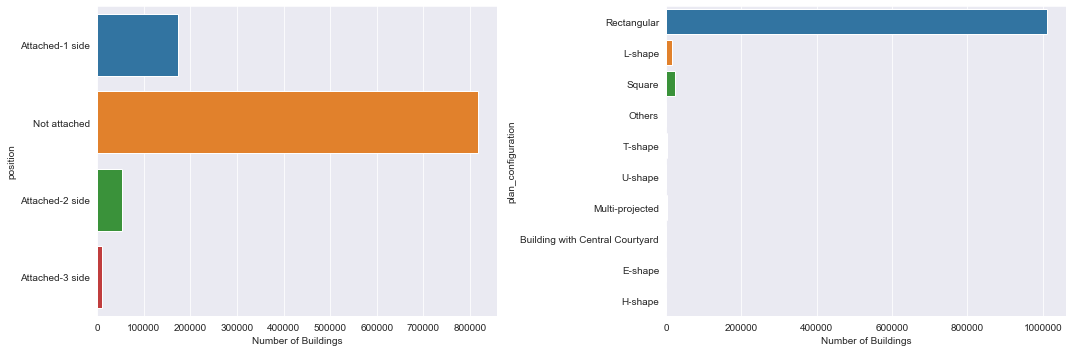

In [7]:
display(structure.loc[(structure['plan_configuration'].isnull())|(structure['position'].isnull())])

print('\n')

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(y=structure['position'])
plt.xlabel("Number of Buildings")
plt.subplot(122)
sns.countplot(y=structure['plan_configuration'])
plt.xlabel("Number of Buildings")

plt.tight_layout()
#will be fill with most common value.

##### visualizing missing vakues in owner dataset: 

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
371809,1d91d49bf76,20,2032,203201,Private,NaN,0.0,0,0,0,0,0,0,0,0,0,0
371860,1d91dd4a15b,20,2032,203202,Private,NaN,NaN,0,0,0,0,0,0,0,0,0,0
419652,1ee89752d47,21,2124,212402,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
419673,13515e93c85e,21,2124,212402,Private,2.0,NaN,0,0,0,0,0,0,0,0,0,0
419721,1ee897527cb,21,2124,212402,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
419723,1ee89752891,21,2124,212402,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
419734,1ee89752cda,21,2124,212402,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
419746,13515e93f73e,21,2124,212402,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
419748,1ee89753322,21,2124,212402,Private,2.0,NaN,0,0,0,0,0,0,0,0,0,0
419749,1ee89753380,21,2124,212402,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0


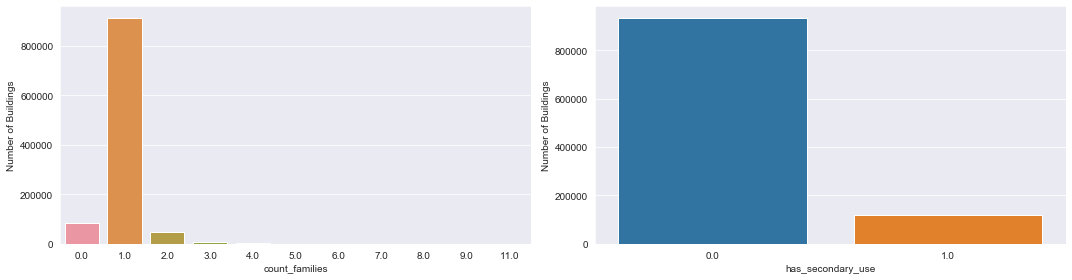

In [8]:
display(owner.loc[(owner['count_families'].isnull())|(owner['has_secondary_use'].isnull())])
#have to fill mode values:

print('\n')

plt.figure(figsize=(15,4))
plt.subplot(121)
sns.countplot(owner['count_families'])
plt.ylabel("Number of Buildings")
plt.subplot(122)
sns.countplot(owner['has_secondary_use'])#fillna has to be filled with 0
plt.ylabel("Number of Buildings")
plt.tight_layout()

##### filling missing values of null features with mode values:

In [9]:
print('Entries with null feature in train dataset are : ')
display(train.loc[train['has_repair_started'].isnull()])

Entries with null feature in train dataset are : 


,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
8,Both,1e96b58fa58,Grade 1,21,0.0,0,0,0,0,0,0,0,NaN,2102
57,Both,1c3d6a2f185e,Grade 1,31,0.0,0,0,0,0,0,0,0,NaN,3105
63,Both,2d456a90fd2,Grade 1,31,0.0,0,0,0,0,0,0,0,NaN,3111
89,Both,2d6ad13c9cf,Grade 1,31,0.0,0,0,0,0,0,0,0,NaN,3121
100,Both,2da2bbe2cef,Grade 1,31,0.0,0,0,0,0,0,0,0,NaN,3136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631674,Both,126ae9f94e6a,Grade 1,20,0.0,0,0,0,0,0,0,0,NaN,2025
631677,Both,2da688ab546,Grade 1,31,0.0,0,0,0,0,0,0,0,NaN,3137
631694,Exterior,2d67515b3a4,Grade 1,31,0.0,0,0,0,0,0,0,0,NaN,3120
631706,Both,2d726ab97cb,Grade 1,31,1.0,0,0,0,1,0,0,0,NaN,3123


##### Filling missing values with mode.

In [10]:
def fill_nan_values(dataset):
    nullfeats = dataset.isnull().sum()
    nullfeatindex = list(nullfeats[nullfeats>0].index)
    for feature in nullfeatindex:
        dataset[feature].fillna(dataset[feature].mode()[0],inplace=True)

In [11]:
#filling missing values in owner dataset:
fill_nan_values(owner)
get_null_feat(owner)

#filling missing values in structure dataset:
fill_nan_values(structure)
get_null_feat(structure)

There are  0 null feature present in  owner  dataset :-

Series([], dtype: int64) 

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
There are  0 null feature present in  structure  dataset :-

Series([], dtype: int64) 

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-


##### What to do for train and test Dataset ?
As number of missing values are more in train and test dataset, we should not simply fill those with mean/median/mode values and creat unnecessary constraint, what we should proceed id find out any particular pattern, which might help us to replace those missing values.

In [12]:
train.columns.to_list()

['area_assesed',
 'building_id',
 'damage_grade',
 'district_id',
 'has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'has_geotechnical_risk_flood',
 'has_geotechnical_risk_land_settlement',
 'has_geotechnical_risk_landslide',
 'has_geotechnical_risk_liquefaction',
 'has_geotechnical_risk_other',
 'has_geotechnical_risk_rock_fall',
 'has_repair_started',
 'vdcmun_id']

In [13]:
def merge_datasets(dataset):
    dataset = pd.merge(dataset,owner,on='building_id')#merging datasets on buiding_id  
    dataset = pd.merge(dataset,structure,on='building_id')
    dataset['ward_id']=dataset['ward_id_x']
    dup_cols = [x for x in dataset.columns if ('id_x' in x) or ('id_y' in x)] #removing multiple columns
    dataset.drop(dup_cols,axis=1,inplace=True)
    return dataset

In [14]:
train=merge_datasets(train)
test=merge_datasets(test)
print('Shape or train dataset : ',train.shape)
print('Shape or test dataset : ',test.shape)

Shape or train dataset :  (631761, 53)
Shape or test dataset :  (421175, 52)


condition_post_eq                        has_repair_started
Covered by landslide                     0.0                      265
                                         1.0                       11
Damaged-Not used                         0.0                   138111
                                         1.0                    11474
Damaged-Repaired and used                1.0                   118828
                                         0.0                     2875
Damaged-Rubble Clear-New building built  1.0                    32754
Damaged-Rubble clear                     0.0                    74117
                                         1.0                     5370
Damaged-Rubble unclear                   0.0                    84902
                                         1.0                     2405
Damaged-Used in risk                     0.0                    95647
                                         1.0                    17136
Not damaged                   



Visualizing The above table :


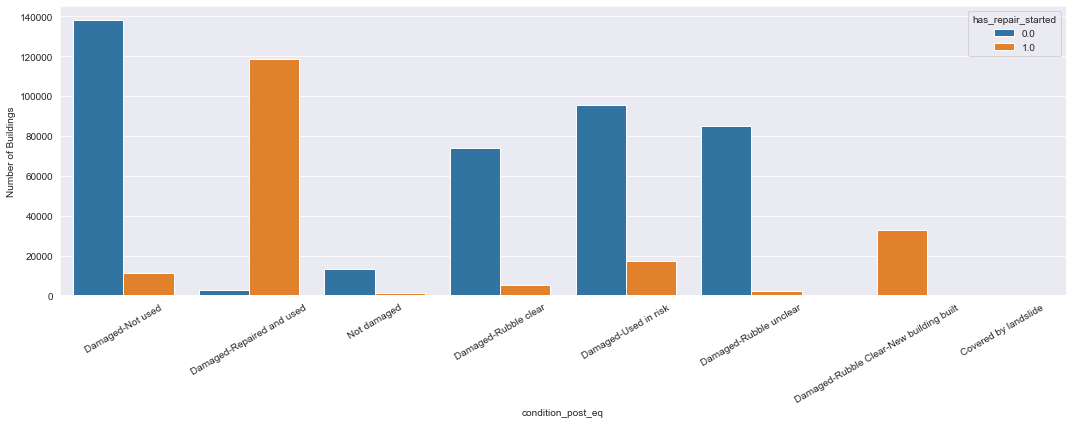

In [15]:
display(train.groupby('condition_post_eq')['has_repair_started'].value_counts())
print('\n')
print('Visualizing The above table :')
plt.figure(figsize=(15,6))
sns.countplot(train['condition_post_eq'],hue=train['has_repair_started'])
plt.ylabel('Number of Buildings')
plt.xticks(rotation=30)
plt.tight_layout()

In [16]:
#name dataset again
train.name = "train"
test.name = "test"

def fill_repair_status(dataset):
    dataset.loc[pd.isnull(dataset['has_repair_started'])&(dataset['condition_post_eq']=='Damaged-Repaired and used'),'has_repair_started']=1.0    
    dataset.loc[pd.isnull(dataset['has_repair_started'])&(dataset['condition_post_eq']=='Not damaged'),'has_repair_started']=0.0    
    
fill_repair_status(train)
fill_repair_status(test)

get_null_feat(train)
get_null_feat(test)

There are  0 null feature present in  train  dataset :-

Series([], dtype: int64) 

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
There are  0 null feature present in  test  dataset :-

Series([], dtype: int64) 

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-


##### Focusing on outliers:
Till now we have replaced missing values which can easily be pointed out, but now we have to look for wrong values
within each variable.

First we have to separate variables on their data-types such as numeric,categorical,binary
and evaluate each separately.


In [17]:
cat_feat = [feat for feat in train.columns if train[feat].dtype=="O" and feat not in ['building_id','damage_grade'] ]

cont_num_feat = [feat for feat in train.columns if (train[feat].dtype=="int64") and (train[feat].nunique()>10) and '_id' not in feat]

dis_num_feat = [feat for feat in train.columns if train[feat].dtype in ['int64','float64'] and train[feat].nunique()>5 and feat not in cont_num_feat and '_id' not in feat]

bin_feat = [feat for feat in train.columns if 'has_' in feat]

id_feat = [feat for feat in train.columns if '_id' in feat]

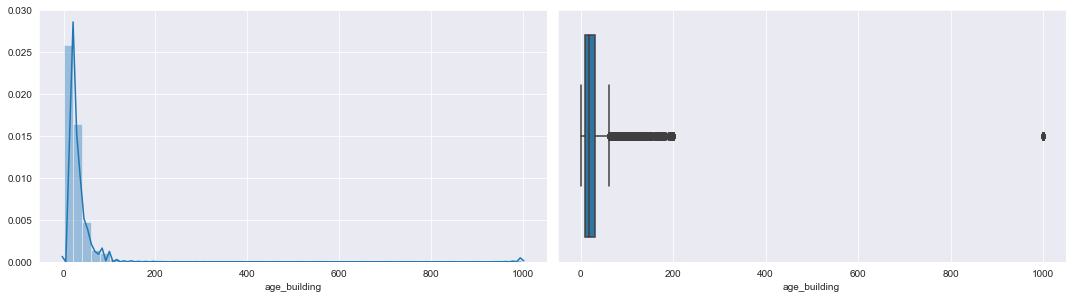

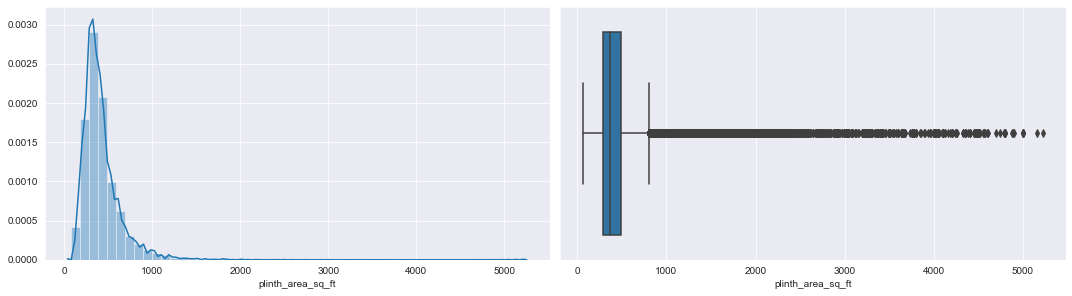

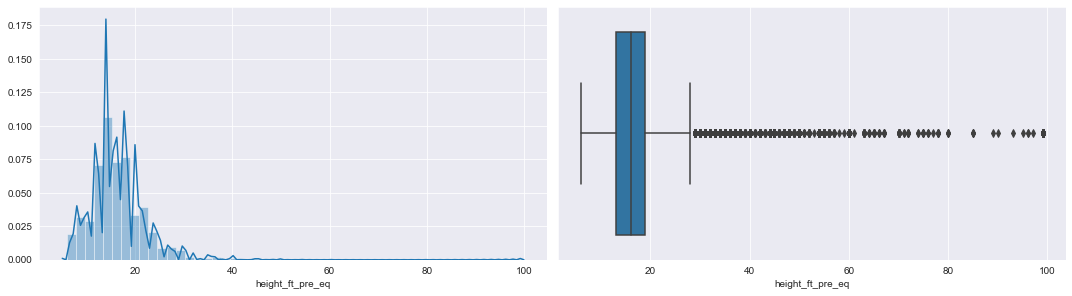

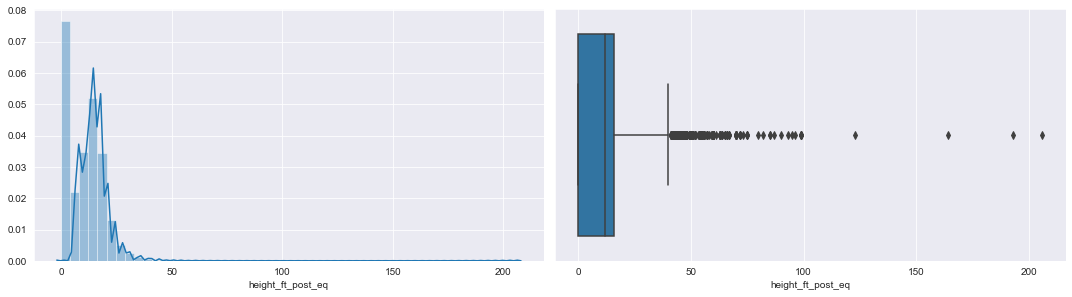

In [18]:
#Seacing for outliers in cont_num_feat
for features in cont_num_feat:
    plt.figure(figsize=(15,16))
    plt.subplot(len(cont_num_feat),2,1)
    sns.distplot(train[features])
    plt.subplot(len(cont_num_feat),2,2)
    sns.boxplot(train[features])
    plt.tight_layout()

1.) Age of building --- Outliers of missing values are filled with value = 999 ,these are present in test dataset too,Hence we need to find a way to deal with that too.

2.) Few buildings have quite high plinth surface area , we will figure out is that normal or an outlier.

3.) Few buildings have height_post_eq greater than height_pre_eq , we will check that if after repair floors are increased than thats fine, otherwise it will be treated as outlier. 

##### 1.) How to determine age of different buildings?

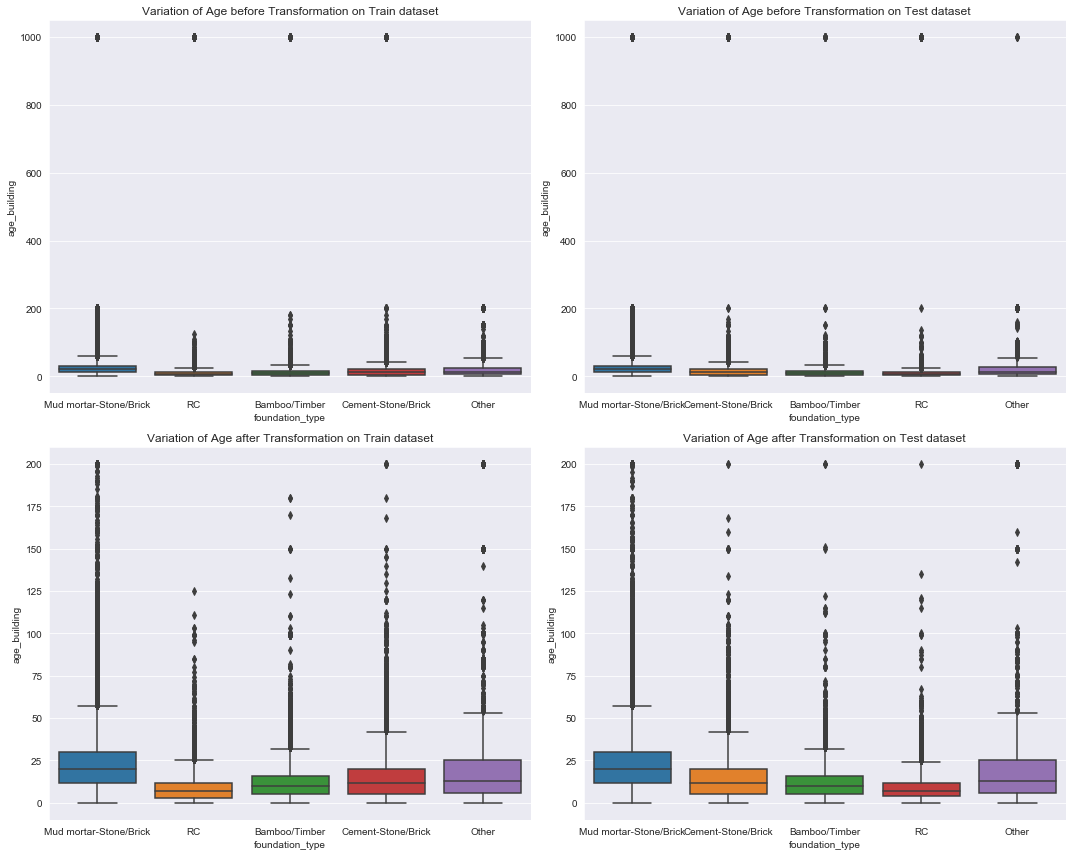

In [19]:
def fill_age(dataset):
    for x in dataset['foundation_type'].unique():
        median = dataset.loc[dataset['foundation_type']==x,'age_building'].median()
        dataset.loc[(dataset['foundation_type']==x)&(dataset['age_building']>400),'age_building']=median
        
#plotting 
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.boxplot(x=train['foundation_type'],y=train['age_building'])
plt.title('Variation of Age before Transformation on Train dataset')

plt.subplot(222)
sns.boxplot(x=test['foundation_type'],y=test['age_building'])   
plt.title('Variation of Age before Transformation on Test dataset')


#replacing wrong values:
fill_age(train)
fill_age(test)
 

plt.subplot(223)
sns.boxplot(x=train['foundation_type'],y=train['age_building'])   
plt.title('Variation of Age after Transformation on Train dataset')

plt.subplot(224)
sns.boxplot(x=test['foundation_type'],y=test['age_building'])   
plt.title('Variation of Age after Transformation on Test dataset')
plt.tight_layout() 

##### 2.) Checking plinth_surface_area.
Plinth area is also called as built-up area and is the entire area occupied by the building including internal and external walls. Plinth area is generally 10-20% more than carpet area.

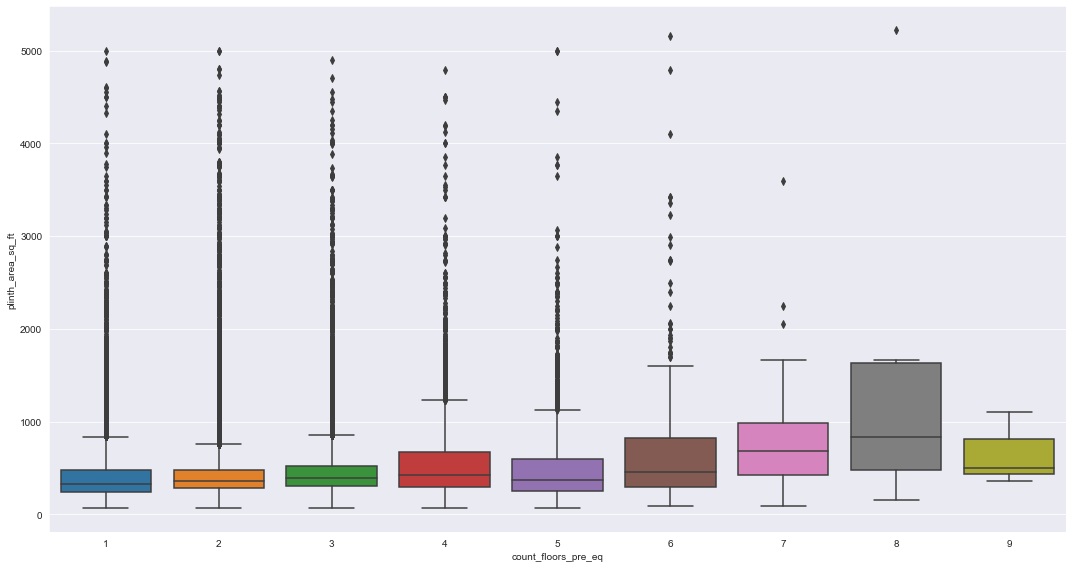

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train['count_floors_pre_eq'],y=train['plinth_area_sq_ft'])
plt.tight_layout()

For now we cannot say that there is an outlier , because there is no general pattern observed. 

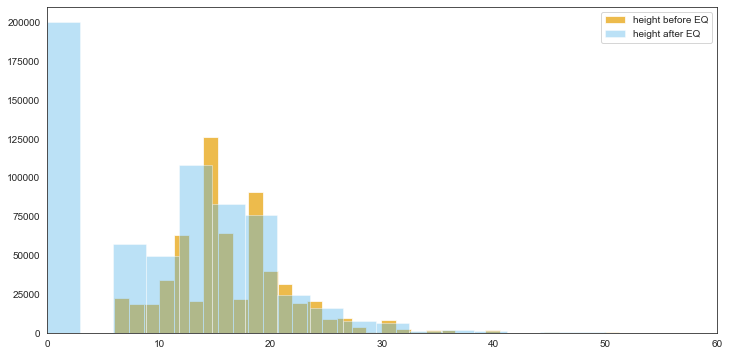

In [21]:
sns.set_style("white")
plt.figure(figsize=(12,6))
x1 = list(train['height_ft_pre_eq'])
x2 = list(train['height_ft_post_eq'])
plt.hist(x1,alpha = 0.7,color='#E69F00',bins=70,label="height before EQ")
plt.hist(x2,alpha = 0.4,color='#56B4E9',bins=70,label="height after EQ")
plt.xlim(0,60)
plt.legend()


##### Change in heights correspond to change in floors.

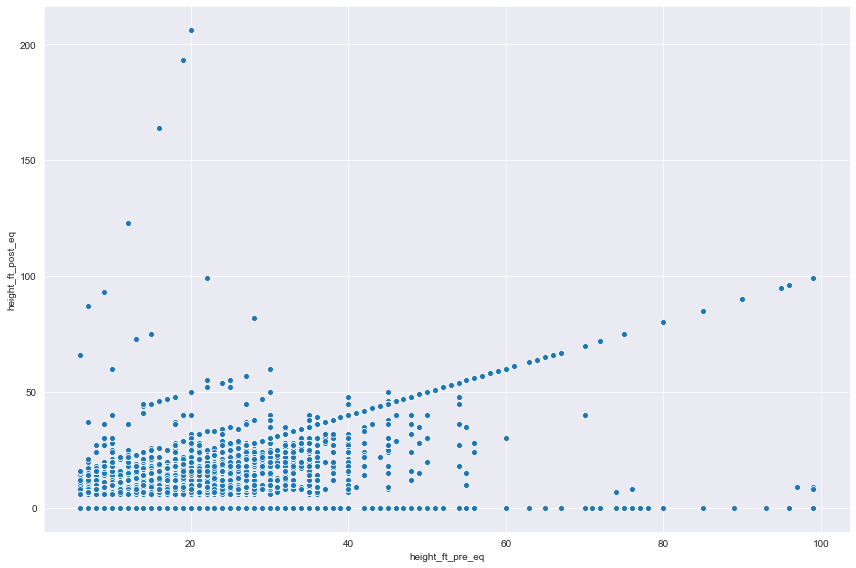

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.scatterplot(x=train['height_ft_pre_eq'],y=train['height_ft_post_eq'])
plt.tight_layout()

##### General pattern observed are while observing heights :-

1.) There is a clear pattern observed for y=0 and x=y axis , representing completely destructed building post earthquake and the latter for no change in height.

2.) There are certain observation where number of floors and their height seems to be outlier, like for count_floor_post_eq=3 a post_height of more than 100 is mismatched.

3.) There are mis-match among height and floor count , we should observe them in separate box-plot


##### Problems encountered while observing floors and their respective heights :-

1.) When pre_floors == 9 , then most of the height are generally less than 90 , this does'nt make sense, hence we need to fix count floors.

2.) When pre_floors == 8 , there are few observation where height is just 24 ft.

3.) There are observations for which count_floor = 1 and height more than 50 ft, we will also replace these values.

4.) Outlier or wrong values are observed where plint_area_sq_ft = (99,999) and height = (99)

###### Some basic thoughts on which we will set our transformation :

1.) If post floor and pre floor count of a building are same then heights should also. Similiarly, there are cases where pre and post height are same but floor couts varies, these should also be same. 

2.) For all numeric type we will consider 99 , 999 as outlier and properly replace it.

3.) Heights lying far away  from outliers should be substituted, for ex- when height is too low wrt floor count.

In [23]:
pref=train['count_floors_pre_eq']
postf=train['count_floors_post_eq']
preh=train['height_ft_pre_eq']
posth=train['height_ft_post_eq']

In [24]:
train[(preh==99)|(posth==99)]

,area_assesed,building_id,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,district_id,vdcmun_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id
269,Exterior,22452ba413e,Grade 5,0.0,0,0,0,0,0,0,0,0.0,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,23,2355,3,0,23.0,99,99,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,235503
451,Building removed,22452ba1a2a,Grade 5,0.0,0,0,0,0,0,0,0,0.0,Private,1.0,1.0,1,0,0,0,0,0,0,0,0,0,23,2355,3,0,20.0,99,99,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,235503
3264,Building removed,22452ba364b,Grade 5,0.0,0,0,0,0,0,0,0,0.0,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,23,2355,3,0,17.0,99,99,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,235503
3947,Exterior,22451890d34,Grade 5,0.0,0,0,0,0,0,0,0,0.0,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,23,2355,3,0,20.0,99,99,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,235501
11031,Building removed,22451891adc,Grade 5,0.0,0,0,0,0,0,0,0,0.0,Private,0.0,0.0,0,0,0,0,0,0,0,0,0,0,23,2355,3,0,10.0,99,99,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,235501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620679,Building removed,22452ba5206,Grade 5,0.0,0,0,0,0,0,0,0,0.0,Private,1.0,1.0,1,0,0,0,0,0,0,0,0,0,23,2355,3,0,20.0,99,99,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,235503
622360,Both,1690b0f5def6,Grade 3,1.0,0,0,0,0,0,0,1,0.0,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,24,2481,2,2,38.0,999,99,99,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Not used,248107
626089,Building removed,22452c7e631,Grade 5,0.0,0,0,0,0,0,0,0,0.0,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,23,2355,3,0,20.0,99,99,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,235503
626945,Building removed,22452ba56b7,Grade 5,0.0,0,0,0,0,0,0,0,0.0,Private,2.0,0.0,0,0,0,0,0,0,0,0,0,0,23,2355,3,0,60.0,99,99,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,235503


In [25]:
def fix_ht_floors(dataset):
    pref=dataset['count_floors_pre_eq']
    postf=dataset['count_floors_post_eq']
    preh=dataset['height_ft_pre_eq']
    posth=dataset['height_ft_post_eq']
    dataset.loc[(posth==99)|(preh==99),'height_ft_pre_eq']=dataset.loc[(posth==99)|(preh==99),'count_floors_pre_eq']*7
    dataset.loc[(posth==99)|(preh==99),'height_ft_post_eq']=dataset.loc[(posth==99)|(preh==99),'count_floors_post_eq']*7
    dataset.loc[(pref==postf)&(preh!=posth),'height_ft_post_eq']=dataset.loc[(pref==postf)&(preh!=posth)]['height_ft_pre_eq']
    dataset.loc[(preh==posth)&(pref!=postf),'count_floors_post_eq']=dataset.loc[(preh==posth)&(pref!=postf)]['count_floors_pre_eq']
    dataset.loc[(pref>7)&(preh<50),'count_floors_pre_eq']=(dataset.loc[(pref>7)&(posth<50),'height_ft_pre_eq'])//7
    dataset.loc[(postf>7)&(posth<50),'count_floors_post_eq']=(dataset.loc[(pref>7)&(posth<50),'height_ft_post_eq'])//7
    
def fix_outlier_height(dataset,floor,min_height,max_height):
    preh=dataset['height_ft_pre_eq']
    posth=dataset['height_ft_post_eq']
    pref=dataset['count_floors_pre_eq']
    postf=dataset['count_floors_post_eq']
    pre_median = dataset.loc[pref==floor,'height_ft_pre_eq'].median()
    dataset.loc[(pref==floor) & ((preh>max_height)|(preh<min_height)),'height_ft_pre_eq']=pre_median
    post_median = dataset.loc[postf==floor,'height_ft_post_eq'].median()
    dataset.loc[(postf==floor) & ((posth>max_height)|(posth<min_height)),'height_ft_post_eq']=post_median
    dataset.loc[postf.isnull(),'count_floors_post_eq']=dataset.loc[postf.isnull(),'height_ft_post_eq']//7
    

def change_to_int(dataset):
    float_type = [x for x in dataset.columns if dataset[x].dtype=='float64']
    for x in float_type:
        dataset[x]=dataset[x].astype(int)


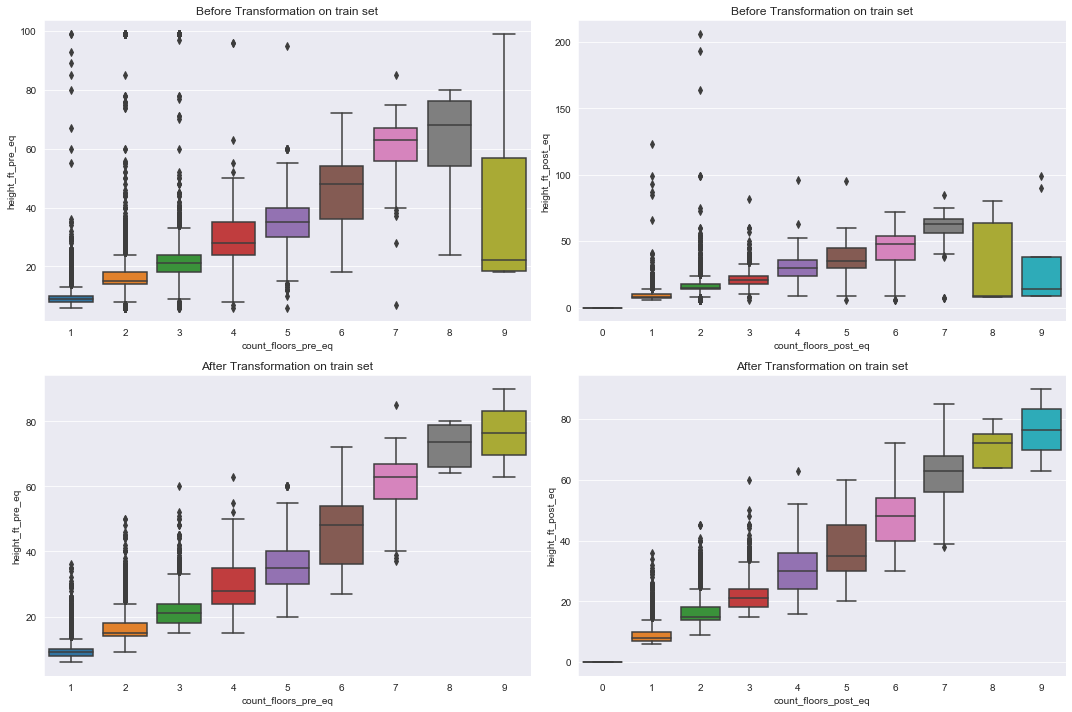

In [26]:
plt.figure(figsize=(15,10))#plotting original scenerio
plt.subplot(221)
sns.boxplot(x=train['count_floors_pre_eq'],y=train['height_ft_pre_eq'])
plt.title("Before Transformation on train set")
plt.subplot(222)
sns.boxplot(x=train['count_floors_post_eq'],y=train['height_ft_post_eq'])
plt.title("Before Transformation on train set")


fix_ht_floors(train)

fix_outlier_height(train,1,6,40)
fix_outlier_height(train,2,9,50)
fix_outlier_height(train,3,15,65)
fix_outlier_height(train,4,15,80)
fix_outlier_height(train,5,20,80)
fix_outlier_height(train,6,25,80)
fix_outlier_height(train,7,30,100)

change_to_int(train)

#plotting scenerio after transformation
plt.subplot(223)
sns.boxplot(x=train['count_floors_pre_eq'],y=train['height_ft_pre_eq'])
plt.title("After Transformation on train set")
plt.subplot(224)
sns.boxplot(x=train['count_floors_post_eq'],y=train['height_ft_post_eq'])
plt.title("After Transformation on train set")
plt.tight_layout()

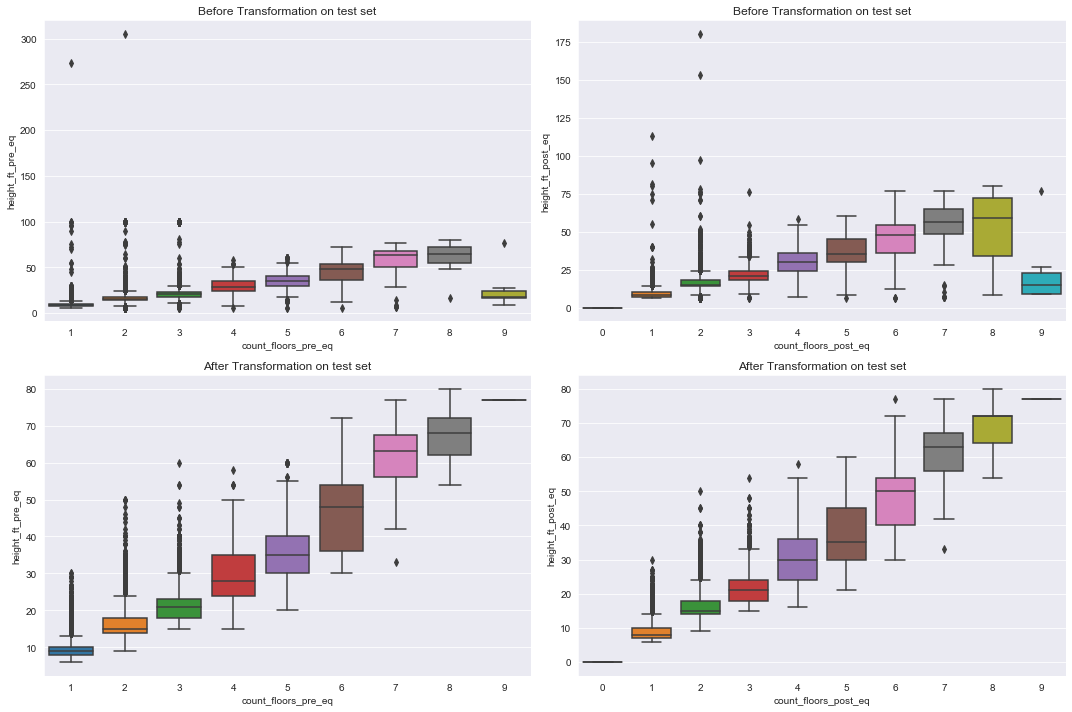

In [27]:
plt.figure(figsize=(15,10))#plotting original scenerio
plt.subplot(221)
sns.boxplot(x=test['count_floors_pre_eq'],y=test['height_ft_pre_eq'])
plt.title("Before Transformation on test set")
plt.subplot(222)
sns.boxplot(x=test['count_floors_post_eq'],y=test['height_ft_post_eq'])
plt.title("Before Transformation on test set")


fix_ht_floors(test)

fix_outlier_height(test,1,6,40)
fix_outlier_height(test,2,9,50)
fix_outlier_height(test,3,15,65)
fix_outlier_height(test,4,15,80)
fix_outlier_height(test,5,20,80)
fix_outlier_height(test,6,25,80)
fix_outlier_height(test,7,30,100)

change_to_int(test)

#plotting scenerio after transformation
plt.subplot(223)
sns.boxplot(x=test['count_floors_pre_eq'],y=test['height_ft_pre_eq'])
plt.title("After Transformation on test set")
plt.subplot(224)
sns.boxplot(x=test['count_floors_post_eq'],y=test['height_ft_post_eq'])
plt.title("After Transformation on test set")
plt.tight_layout()

For now , we have managed to process data transformation for floors and heights for both train and test dataset.

#### Starting some Data Featuring

##### 1.) One of the thing is change in floors or change in height.

Visualizing count of buildings for change in floors :---

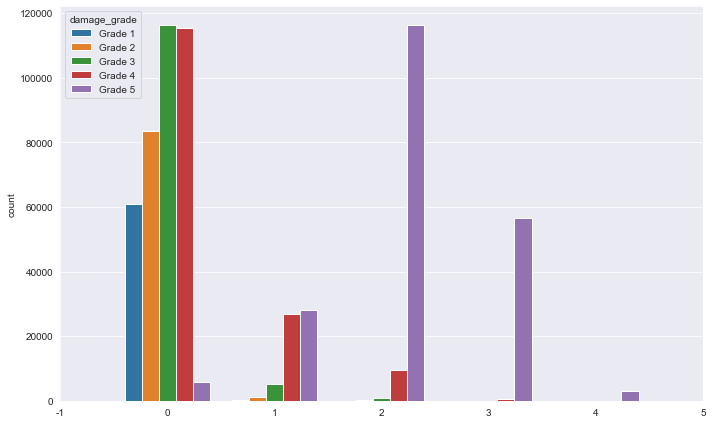

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x=train['count_floors_pre_eq']-train['count_floors_post_eq'],hue=train['damage_grade'].sort_values())
plt.xlim(3,9)
plt.tight_layout()

Plotting change in floors :--- 


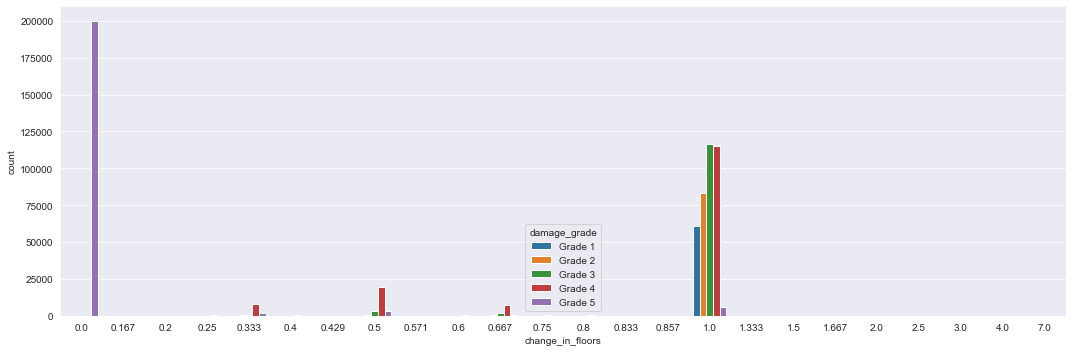

In [29]:
def change_in(dataset):
    dataset['change_in_floors']=round(dataset['count_floors_post_eq']/dataset['count_floors_pre_eq'],3)
    dataset['change_in_height']=round(dataset['height_ft_post_eq']/dataset['height_ft_pre_eq'],3)

change_in(train)
change_in(test)

print("Plotting change in floors :--- ") 
plt.figure(figsize=(15,5))
sns.countplot(train['change_in_floors'],hue=train['damage_grade'].sort_values())
plt.tight_layout()

With this transformation we were able to segregate damage grade == 5 easily,further we observe that for fraction values mostly shows damage grade == 4 ,hence it turn out to be usefull transformation.

##### 2.) Another thing is superstructure, which gives us an idea for how rigid a building is.

We will try to count the total count of superstructure of a building.

In [30]:
def count_ss(dataset):
    sup_str = [x for x in train.columns if 'superstructure' in x]
    series = pd.Series([0 for x in range(len(dataset))])
    for feat in sup_str:
        series += dataset[feat]
    return series


train['count_sup_str'] = count_ss(train)
test['count_sup_str'] = count_ss(test)

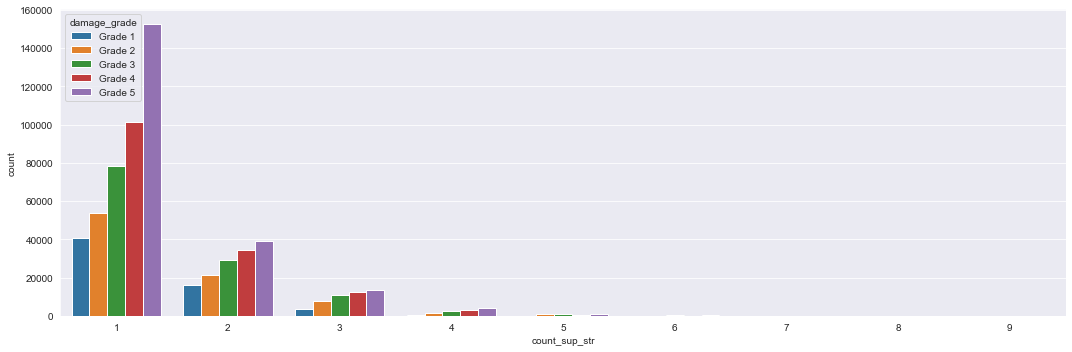

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(train['count_sup_str'],hue=train['damage_grade'].sort_values())
plt.tight_layout()

Well , it turn out that this feature is not able to clearly distinct between our predictor asit follows same pattern for each value, thus we can keep it or remove it.

##### 3.)Similiar to superstructure, we can apply same for risk.

We will try to count the total risk a building is affected with.

In [32]:
def count_risk(dataset):
    has_risk = [x for x in train.columns if 'risk' in x]
    series = pd.Series([0 for x in range(len(dataset))])
    for feat in has_risk:
        series += dataset[feat]
    return series

test['sum_risk'] = count_risk(test)
train['sum_risk'] = count_risk(train)

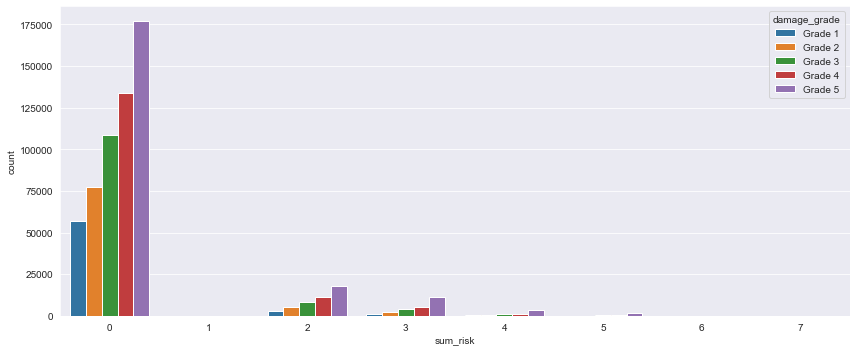

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(train['sum_risk'],hue=train['damage_grade'].sort_values())
plt.tight_layout()

Well , it turn out that this feature is not able to clearly distinct between our predictor asit follows same pattern for each value, thus we can keep it or remove it.

##### 4.) Gettin an idea for destruction-level in various district

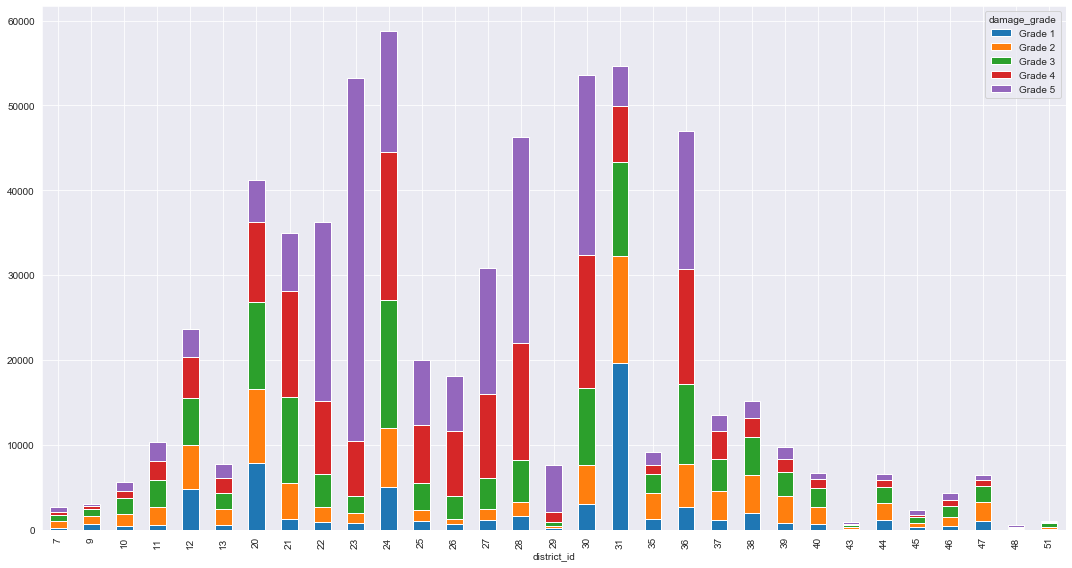

In [34]:
df_plot = train.groupby(['district_id','damage_grade']).size().reset_index().pivot(columns='damage_grade',index='district_id',values=0) 
df_plot.plot(kind='bar',stacked=True,figsize=(15,8))
plt.tight_layout()

General conclusions while visualising district_id :

1.) District with most damage are 20,23,24,28,30,31,36.

2.) For District id 22,23,27,28,29,30 are worstly affected.


##### 5.) Focusing on area-assesed

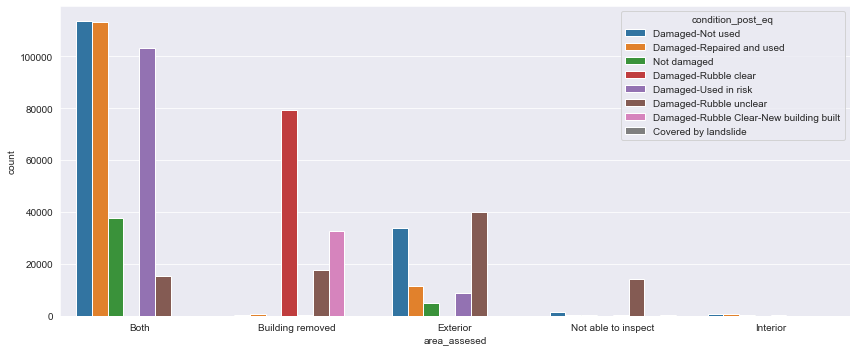

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x=train['area_assesed'],hue=train['condition_post_eq'])
plt.tight_layout()

#we need somthing to distinct lower level of damage grade.

we can think of combining area assesed by cond post eq to get a feature and lets see if it gives us unique pattern.

In [36]:
datasets=[train,test]
for dataset in datasets:
    dataset['area_assesed'+'_'+'condition_post_eq'] = dataset['area_assesed']+'_'+dataset['condition_post_eq']

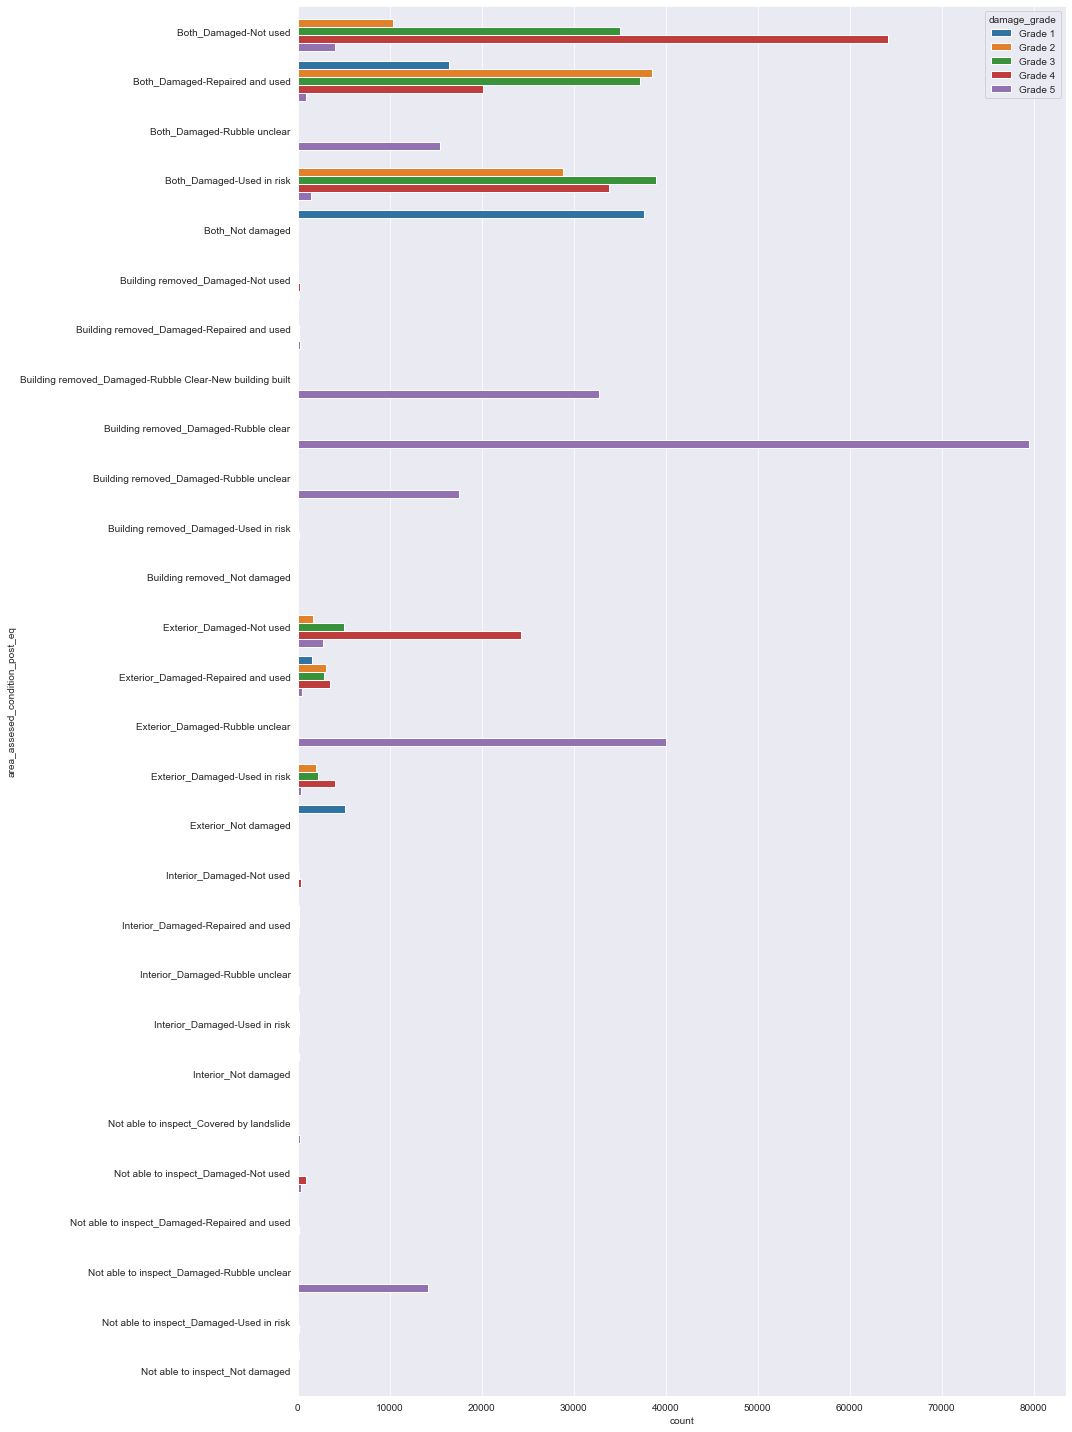

In [37]:
plt.figure(figsize=(15,20))
sns.countplot(y=train['area_assesed_condition_post_eq'].sort_values(),hue=train['damage_grade'].sort_values())
plt.tight_layout()

This feature is somewhat better than its parent feature , cause it elaborates all diff possibilites.

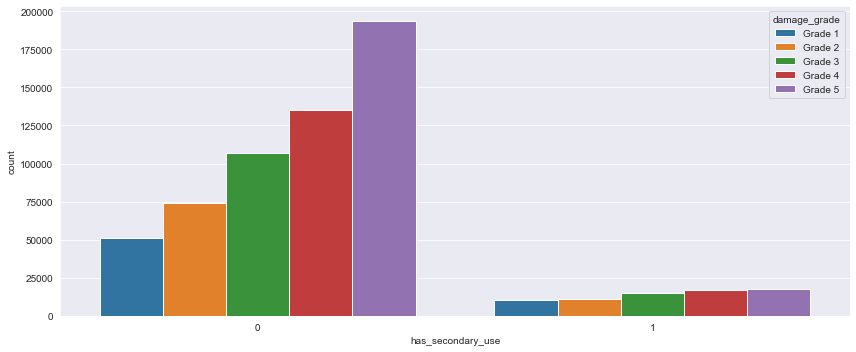

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x=train['has_secondary_use'],hue=train['damage_grade'].sort_values())
plt.tight_layout()

##### 6.) Mapping Ordinal Category - Land_condition:

In [39]:
land_map = {'Flat':1,'Moderate slope':2,'Steep slope':3}
datasets=[train,test]
for dataset in datasets:
    dataset['land_surface_condition']=dataset['land_surface_condition'].map(land_map)

##### 7.) Observing Variavle which are  Label encoded:

In [40]:
all_use = [x for x in train.columns if 'use_' in x]
all_risk = [x for x in train.columns if 'risk_' in x]
all_ss = [x for x in train.columns if 'superstructure_' in x]

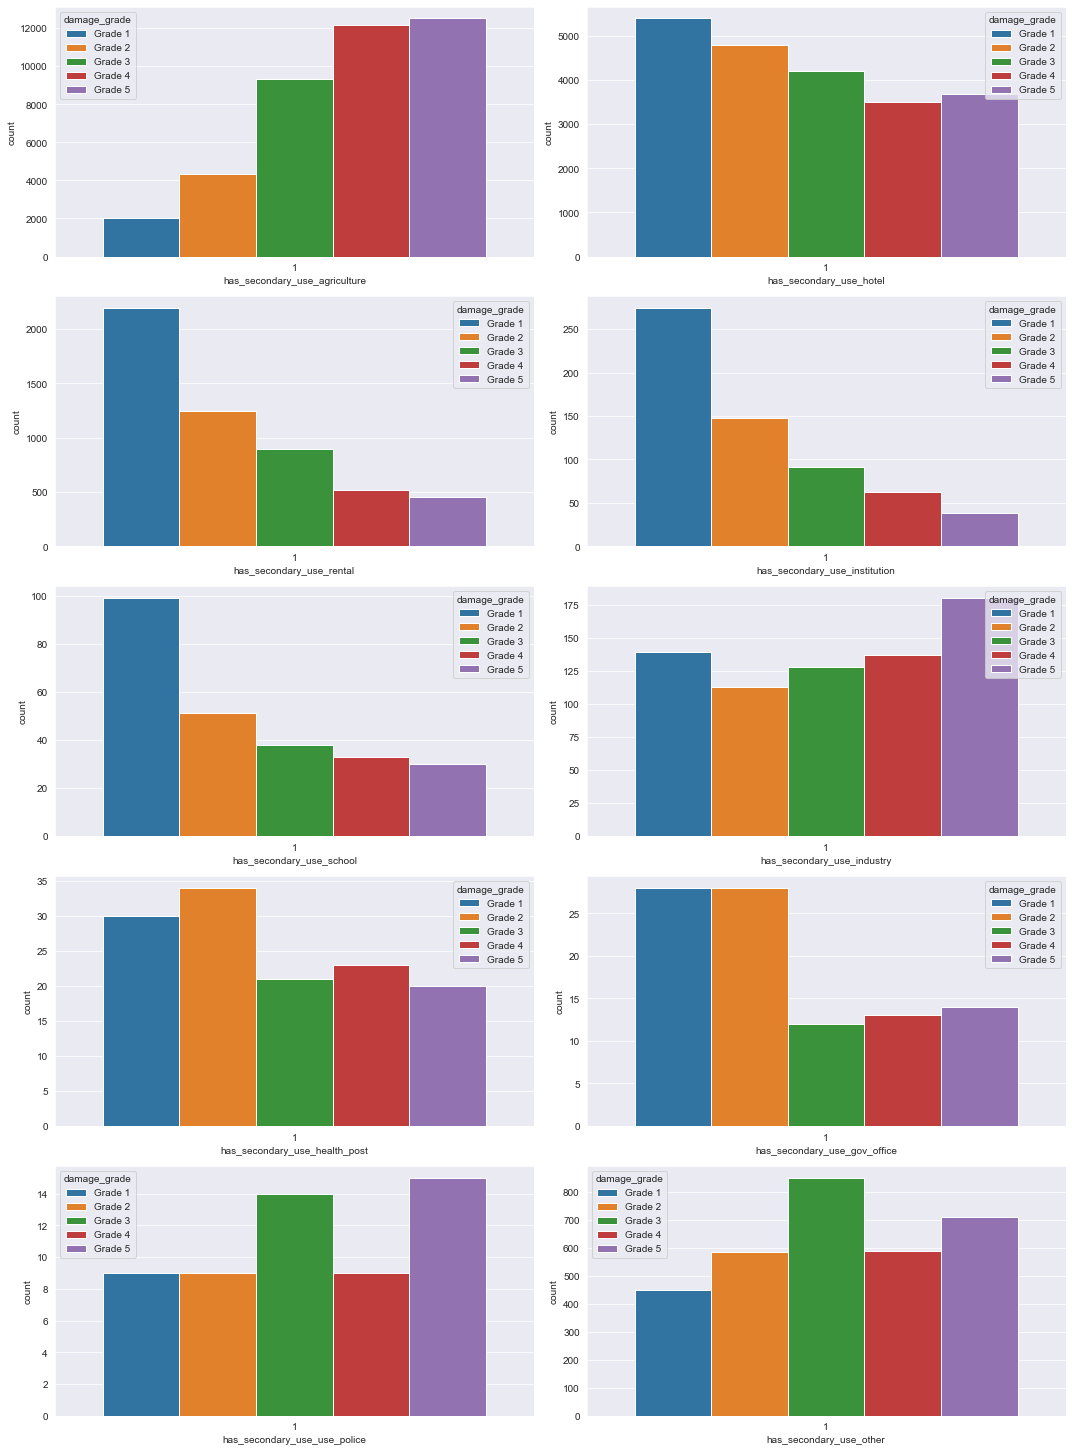

In [41]:
plt.figure(figsize=(15,40))
for index,feat in enumerate(all_use,1):
    plt.subplot(len(all_use),2,index)
    sns.countplot(x=train[train[feat]==1][feat],hue=train['damage_grade'].sort_values())
plt.tight_layout()

Many buidings like institution , hotels , schools are less prone to eq , which can be simply understand that such  buildings are built with RC or cement structure.

In agricultural buildings bamboo,mod , stones are mostly used , hence these are more likely prone to damage.



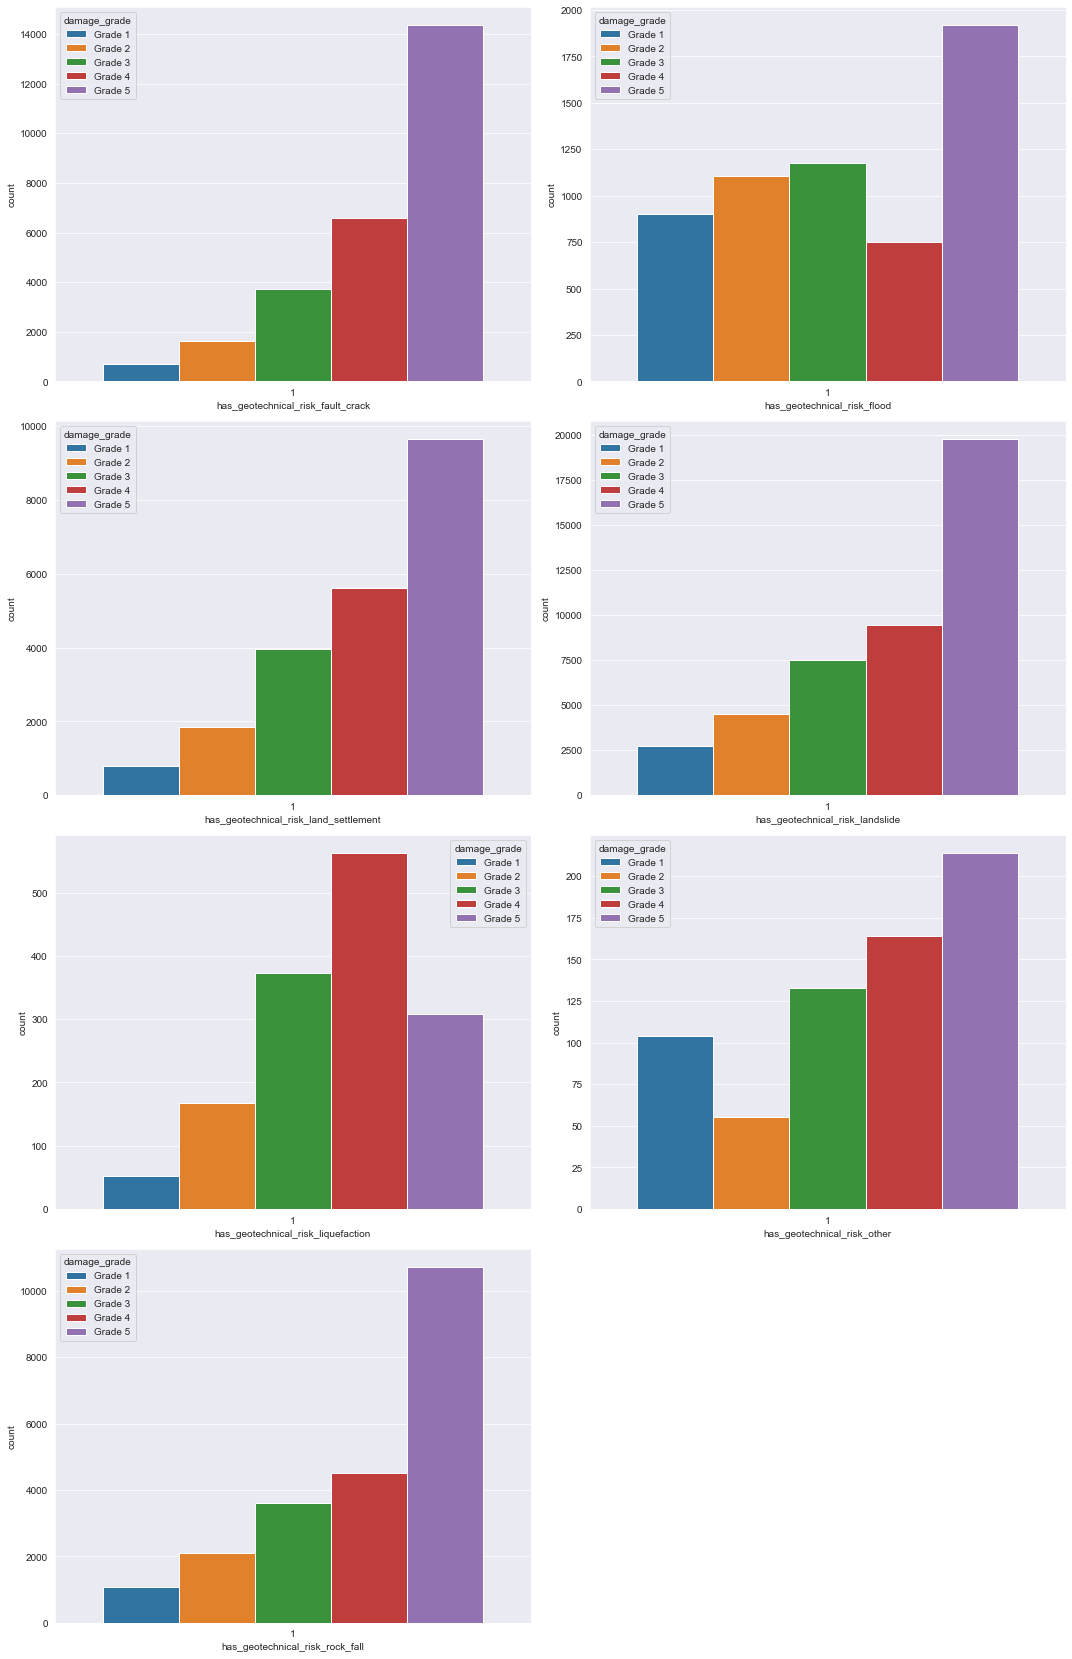

In [42]:
plt.figure(figsize=(15,40))
for index,feat in enumerate(all_risk,1):
    plt.subplot(len(all_risk),2,index)
    sns.countplot(x=train[train[feat]==1][feat],hue=train['damage_grade'].sort_values())
plt.tight_layout()

Well most of buildings  are  prone to Land issues.

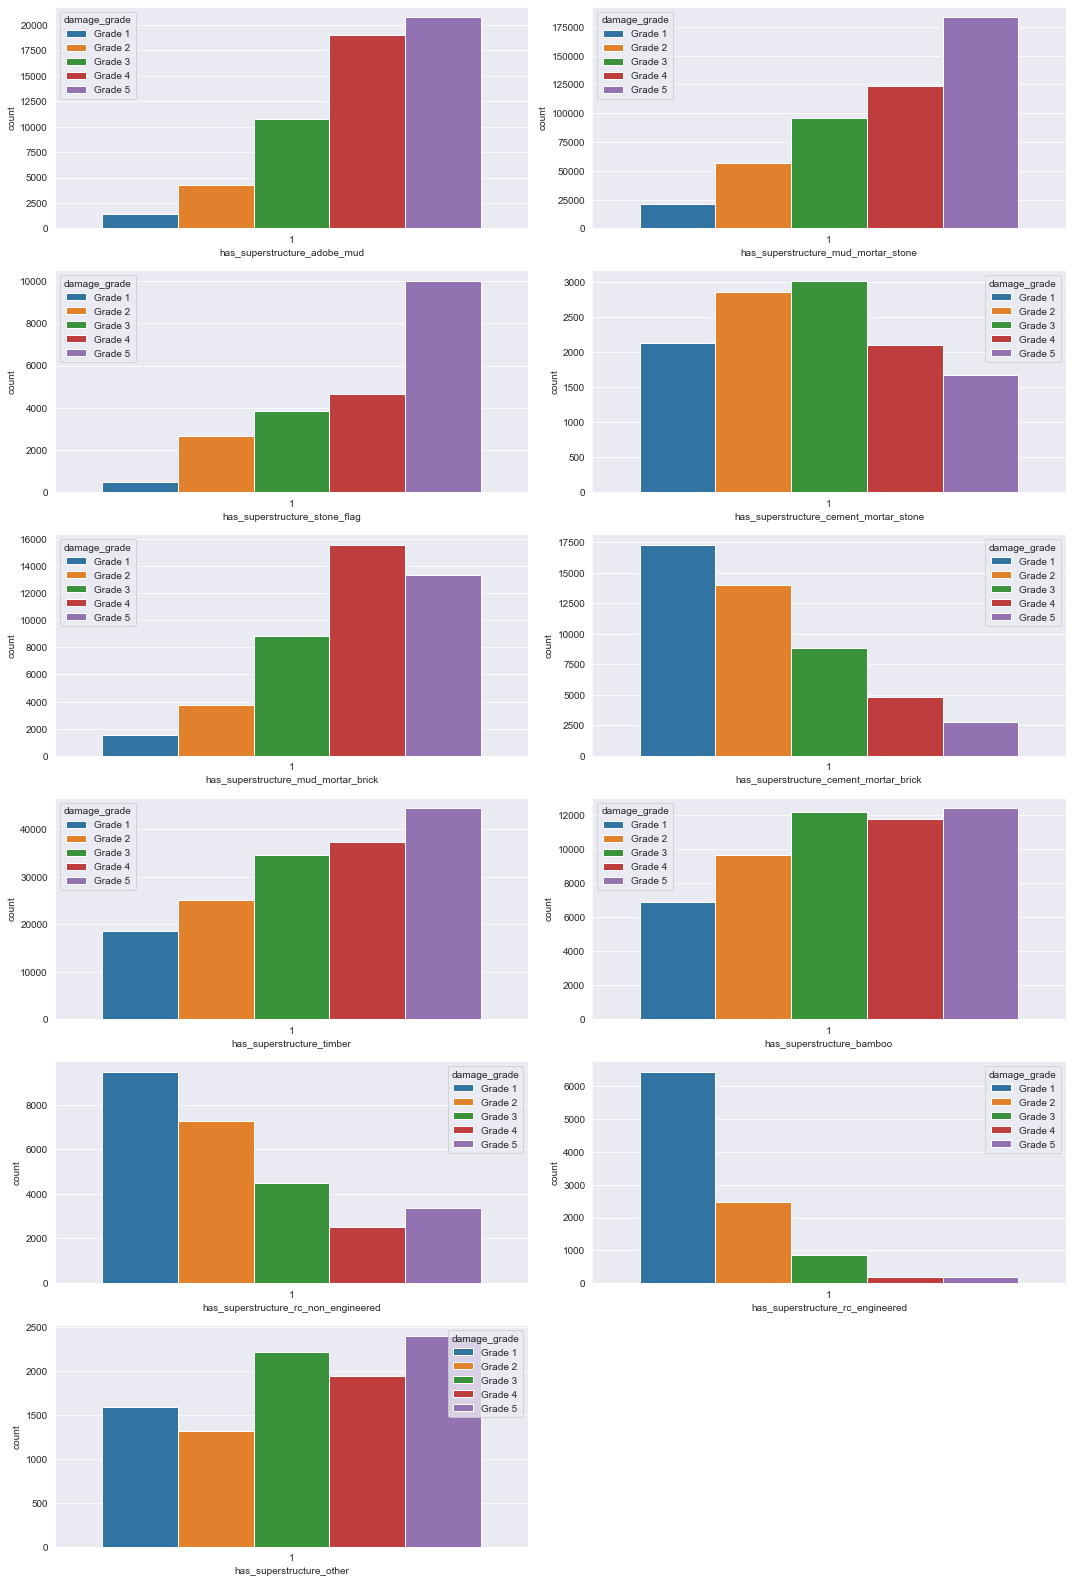

In [43]:
plt.figure(figsize=(15,40))
for index,feat in enumerate(all_ss,1):
    plt.subplot(len(all_ss),2,index)
    sns.countplot(x=train[train[feat]==1][feat],hue=train['damage_grade'].sort_values())
plt.tight_layout()

##### 8.) Plan Configuration

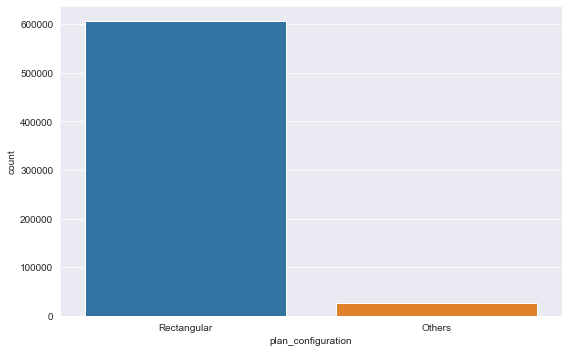

In [44]:
train.loc[train['plan_configuration']!='Rectangular','plan_configuration']='Others'
test.loc[test['plan_configuration']!='Rectangular','plan_configuration']='Others'

plt.figure(figsize=(8,5))
sns.countplot(x=train['plan_configuration'])
plt.tight_layout()


##### 9.) Position

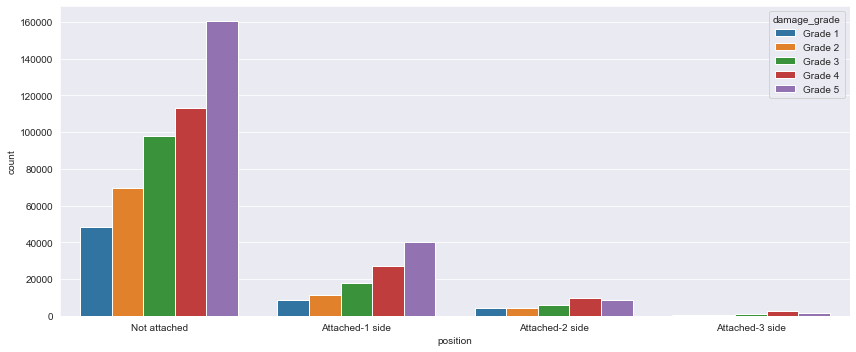

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(x=train['position'],hue=train['damage_grade'].sort_values())
plt.tight_layout()


#### Transformation on Continious Variables:

In [56]:
def sqrt_feat(dataset):
    feature = ['age_building','plinth_area_sq_ft']
    for feat in feature:
        dataset['sqrt_'+feat]=np.sqrt(dataset[feat])
        
sqrt_feat(train)
sqrt_feat(test)

#### Removing features:

In [57]:
def remove_cols(dataset):
    remove_cols = ['condition_post_eq','height_ft_post_eq','height_ft_pre_eq','count_floors_post_eq','count_floors_pre_eq',
                   'vdcmun_id','district_id','building_id','area_assesed','age_building','plinth_area_sq_ft']
    dataset.drop(remove_cols,axis=1,inplace=True)

remove_cols(train)
remove_cols(test)

In [58]:
train.head(10)

,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,ward_id,change_in_floors,change_in_height,count_sup_str,sum_risk,area_assesed_condition_post_eq,sqrt_age_building,sqrt_plinth_area_sq_ft
0,Grade 4,0,0,0,0,0,0,0,0,0,Private,2,0,0,0,0,0,0,0,0,0,0,0,1,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,248903,1.0,1.0,1,0,Both_Damaged-Not used,4.582576,19.621417
1,Grade 2,0,0,0,0,0,0,0,0,1,Private,1,1,0,1,0,0,0,0,0,0,0,0,1,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,1,0,0,0,0,0,0,442304,1.0,1.0,2,0,Both_Damaged-Repaired and used,5.744563,24.535688
2,Grade 1,0,0,0,0,0,0,0,0,0,Private,1,0,0,0,0,0,0,0,0,0,0,0,3,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,0,0,0,0,0,0,0,0,0,1,0,365008,1.0,1.0,1,0,Both_Not damaged,1.414214,26.457513
3,Grade 5,0,0,0,0,0,0,0,0,0,Private,1,0,0,0,0,0,0,0,0,0,0,0,1,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,301605,0.0,0.0,1,0,Building removed_Damaged-Rubble clear,1.732051,17.748239
4,Grade 3,0,0,0,0,0,0,0,0,0,Private,1,0,0,0,0,0,0,0,0,0,0,0,1,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,362705,1.0,1.0,1,0,Both_Damaged-Used in risk,4.690416,16.881943
5,Grade 5,0,0,0,0,0,0,0,0,0,Private,0,0,0,0,0,0,0,0,0,0,0,0,1,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,215301,0.0,0.0,1,0,Exterior_Damaged-Rubble unclear,6.403124,20.000000
6,Grade 2,1,0,0,0,1,0,0,1,0,Public,1,0,0,0,0,0,0,0,0,0,0,0,1,Bamboo/Timber,Bamboo/Timber-Light roof,Brick/Stone,Not applicable,Not attached,Rectangular,0,0,0,0,0,0,1,1,0,0,0,301809,1.0,1.0,2,3,Both_Damaged-Used in risk,1.732051,9.327379
7,Grade 5,0,0,0,0,0,0,0,0,0,Private,1,0,0,0,0,0,0,0,0,0,0,0,2,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,Timber-Planck,Attached-1 side,Rectangular,1,1,0,0,1,0,0,0,1,0,0,260508,0.0,0.0,4,0,Both_Damaged-Rubble unclear,7.071068,20.976177
8,Grade 1,0,0,0,0,0,0,0,0,0,Private,1,0,0,0,0,0,0,0,0,0,0,0,1,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Not attached,Rectangular,0,0,0,1,0,1,0,0,0,1,0,210204,1.0,1.0,3,0,Both_Not damaged,1.000000,24.899799
9,Grade 3,0,0,0,0,0,0,0,0,1,Private,1,0,0,0,0,0,0,0,0,0,0,0,1,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,392902,1.0,1.0,1,0,Both_Damaged-Repaired and used,3.605551,14.212670


#### Get_Dummies followed by Train_test_split 

In [59]:
X=train.drop('damage_grade',axis=1)
y=train['damage_grade']

In [60]:
X = pd.get_dummies(X,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Classification-Models:

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import 
from sklearn.metrics import classification_report,confusion_matrix , accuracy_score

In [68]:
dt=DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred_tree = dt.predict(X_test)
tree_acc = accuracy_score(y_test,y_pred_tree)
print("Accuracy of Decision Tree :",tree_acc)

Accuracy of Decision Tree : 0.7120810007967119


In [69]:
rf=RandomForestClassifier(n_estimators=200, min_samples_leaf=2,n_jobs=-1)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test,y_pred_rf)
print("Accuracy of Random Forest :",rf_acc)

Accuracy of Random Forest : 0.7422610787795008
